In [1]:
"""
1. At the beginning of your code write a comment that states the topic of your research
project.

2. Some of you have outlined multiple questions to pursue. For this assignment pick ONE
of those questions and add it to the comments.
3. Many of you have outlined multiple ideas of plots to create or calculations to make.
For this assignment pick ONE of those ideas and add it to the comments.
4. The title of the code should be informative with regards to what the code does.
Queshtion
For my topic I will analysis now the inital galxies contribute to the final shape of the remant. 
I will do this by maping the density of MW,M31 and both combined as veiwed from the top down.
The queshtion I am trying to answer is: Once merged do M33/Mw stick to gether are create recognizable strucures in the remanant?

Step 1: combine M31 and MW halo particles inot one data, keeping track of which particles come from which system
    we want to use the previously made fucntions combine data, make new txt file with 8th columb with system
Step 2: find COM of combined data
    use center of mass function for this
Step 3: rotate system so we can view it face on
    Lab 7
Step 4: plot denisty of head on view
    step 4a: PLot just Mw particles
    step 4b: PLot just M31 particles
    step 4c: PLot both MW and M31 particles
step 5: extract x,y data points from density contor
steps 6: fit ellipse to x,y density contor

"""


'\n1. At the beginning of your code write a comment that states the topic of your research\nproject.\n\n2. Some of you have outlined multiple questions to pursue. For this assignment pick ONE\nof those questions and add it to the comments.\n3. Many of you have outlined multiple ideas of plots to create or calculations to make.\nFor this assignment pick ONE of those ideas and add it to the comments.\n4. The title of the code should be informative with regards to what the code does.\nQueshtion\nFor my topic I will analysis now the inital galxies contribute to the final shape of the remant. \nI will do this by maping the density of MW,M31 and both combined as veiwed from the top down.\nThe queshtion I am trying to answer is: Once merged do M33/Mw stick to gether are create recognizable strucures in the remanant?\n\nStep 1: combine M31 and MW halo particles inot one data, keeping track of which particles come from which system\n    we want to use the previously made fucntions combine data,

In [3]:



# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# my modules
from ReadFile import Read
from CenterOfMassCopy1 import CenterOfMass
from MassProfile import MassProfile

# for contours
import scipy.optimize as so


In [4]:
#Get data for snap 630/gyr 9 for both MW and M31
MW=np.genfromtxt('VLowRes/MW/MW_630.txt',skip_header=3)
M31=np.genfromtxt('VLowRes/M31/M31_630.txt',skip_header=3)

In [5]:
#create index the will remove all non halo particles
index = np.where(MW[:,0] == 1)
#Create array full of ones with one more columb then the MW data
a = np.full((len(MW),len(MW[0])+1),1,dtype='float')
#add MW data to new array, columb 8 keeps its 1
a[:,:-1] = MW
#remove none halo particles
a=a[index]
#create index the will remove all non halo particles
index = np.where(M31[:,0] == 1)
#Create array full of twos with one more columb then the MW data
b = np.full((len(M31),len(M31[0])+1),2,dtype='float')
#add M31 data to new array, columb 8 keeps its 2
b[:,:-1] = M31
#remove none halo particles
b=b[index]
#combine MW and M31 arrays
halo=np.concatenate((a,b))

In [61]:
#create txt file with combined halo paricles so we can use center of mass class
np.savetxt("LowRes.txt", halo,  comments='#', 
                   header="{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}"\
                   .format('t', 'm', 'x', 'y', 'z', 'vx', 'vy', 'vz','gal'))

In [6]:
# Create a COM of object for for combined particles using center of mass object from HW 4
COMD = CenterOfMass("LowRes.txt",1)

In [7]:
# Compute COM of all halo particles
COMP = COMD.COM_P(0.1)

COMV = COMD.COM_V(COMP[0],COMP[1],COMP[2])
# Determine positions of helo particles relative to COM 
xD = COMD.x - COMP[0].value 
yD = COMD.y - COMP[1].value 
zD = COMD.z - COMP[2].value 

# total magnitude
rtot = np.sqrt(xD**2 + yD**2 + zD**2)

# Determine velocities of particles relatiev to COM motion
vxD = COMD.vx - COMV[0].value 
vyD = COMD.vy - COMV[1].value 
vzD = COMD.vz - COMV[2].value 

# total velocity 
vtot = np.sqrt(vxD**2 + vyD**2 + vzD**2)

# Arrays for r and v 
r = np.array([xD,yD,zD]).T # transposed 
v = np.array([vxD,vyD,vzD]).T

In [9]:
# Code for plotting contours
# from https://gist.github.com/adrn/3993992
#function from lab 7

def find_confidence_interval(x, pdf, confidence_level):
    return pdf[pdf > x].sum() - confidence_level

def density_contour(xdata, ydata, nbins_x, nbins_y, ax=None, **contour_kwargs):
    """ Create a density contour plot.
    Parameters
    ----------
    xdata : numpy.ndarray
    ydata : numpy.ndarray
    nbins_x : int
        Number of bins along x dimension
    nbins_y : int
        Number of bins along y dimension
    ax : matplotlib.Axes (optional)
        If supplied, plot the contour to this axis. Otherwise, open a new figure
    contour_kwargs : dict
        kwargs to be passed to pyplot.contour()
        
    Example Usage
    -------------
     density_contour(x pos, y pos, contour res, contour res, axis, colors for contours)
     e.g.:
     density_contour(xD, yD, 80, 80, ax=ax, 
         colors=['red','orange', 'yellow', 'orange', 'yellow'])

    """

    H, xedges, yedges = np.histogram2d(xdata, ydata, bins=(nbins_x,nbins_y), density=True)
    # NOTE : if you are using the latest version of python, in the above: 
    # instead of normed=True, use density=True
    
    x_bin_sizes = (xedges[1:] - xedges[:-1]).reshape((1,nbins_x))
    y_bin_sizes = (yedges[1:] - yedges[:-1]).reshape((nbins_y,1))

    pdf = (H*(x_bin_sizes*y_bin_sizes))
    
    X, Y = 0.5*(xedges[1:]+xedges[:-1]), 0.5*(yedges[1:]+yedges[:-1])
    Z = pdf.T
    fmt = {}
    
    ### Adjust Here #### 
    
    # Contour Levels Definitions
    #one_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.68))
    two_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.9))
    #three_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.99))
    
    # You might need to add a few levels
    #onetwo_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.8))

    # Array of Contour levels. Adjust according to the above
    levels = [two_sigma][::-1]
    # contour level labels  Adjust accoding to the above.
    strs = ['0.9'][::-1]

    ###### 
    data=np.empty((2,1))
    if ax == None:
        contour = plt.contour(X, Y, Z, levels=levels, origin="lower", **contour_kwargs)
        for l, s in zip(contour.levels, strs):
            fmt[l] = s
            data=contour.allsegs[0][1].T
            ax.plot(data[0,:],data[1,:],"bp")
        plt.clabel(contour, contour.levels, inline=True, fmt=fmt, fontsize=12)
        for i in range(len(contour.allsegs[0])):
            a=contour.allsegs[0][i].T
            b=data
            data=np.concatenate((a,b),axis=1)

    else:
        contour = ax.contour(X, Y, Z, levels=levels, origin="lower", **contour_kwargs)
        for l, s in zip(contour.levels, strs):
            fmt[l] = s
        ax.clabel(contour, contour.levels, inline=True, fmt=fmt, fontsize=12)

        for i in range(len(contour.allsegs[0])):
            a=contour.allsegs[0][i].T
            b=data
            data=np.concatenate((a,b),axis=1)

    
    return data, contour

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-9618.5    , -9598.39323, -9578.28646, ..., 10448.05646,
        10468.16323, 10488.27   ]),
 array([-10900.98  , -10879.8915, -10858.803 , ...,  10145.343 ,
         10166.4315,  10187.52  ]),
 <matplotlib.collections.QuadMesh at 0x27b0ea79b50>)

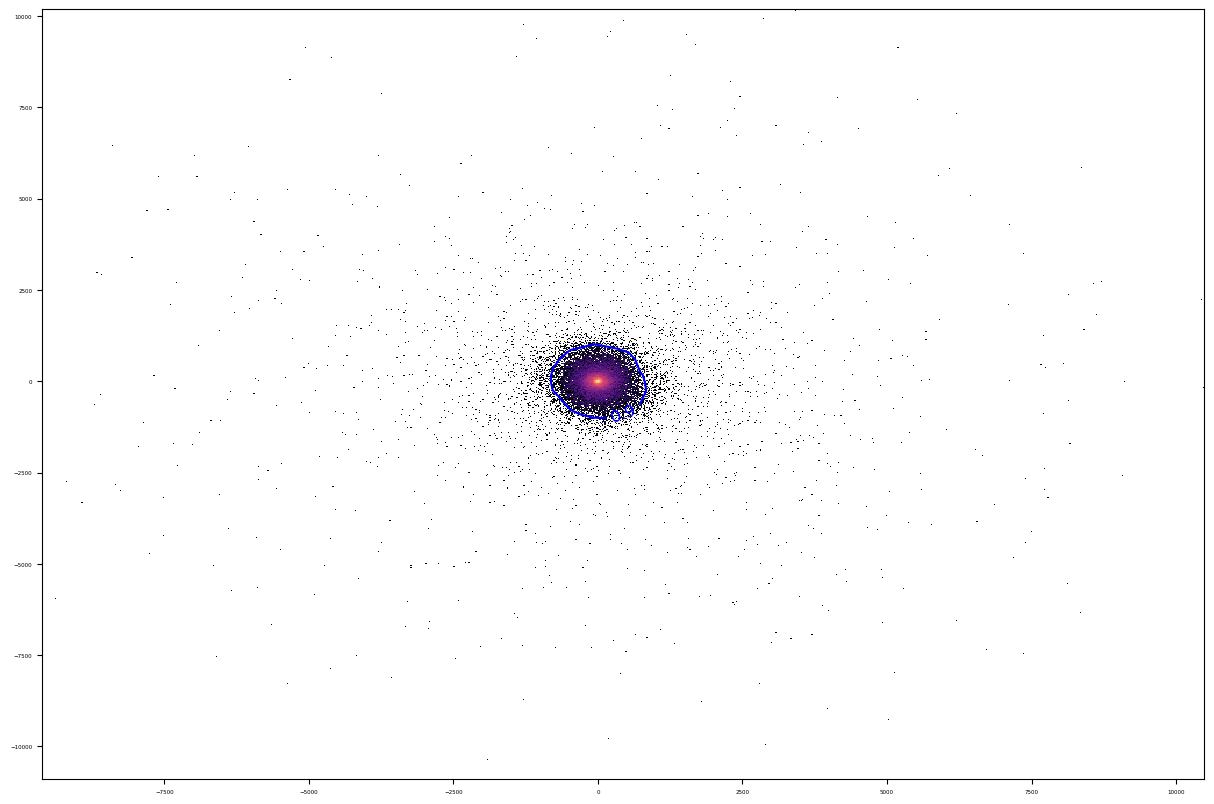

In [213]:
fig, ax= plt.subplots(figsize=(15, 10))
d,c=density_contour(r[:,0],r[:,1], 100, 100, ax=ax, colors=['blue'])
ax.set_xlim(200,-200)
ax.set_ylim(200,-200)
ax.hist2d(r[:,0],r[:,1],bins=1000, norm=LogNorm(), cmap='magma')

In [214]:
for i in range(len(d[0])):
    if d[0,i]<=100 and d[0,i]>=-100:
        print(i)
        print(np.sqrt(d[0,i]**2+d[1,i]**2))

13
1016.285557776021
29
1001.267760173031
32
0.3143424883785197


In [215]:
#functino to rotate particls so that angular momentum is aligned with z axis
#code from lab 7
def RotateFrame(posI,velI):
    """a function that will rotate the position and velocity vectors
    so that the disk angular momentum is aligned with z axis. 
    
    PARAMETERS
    ----------
        posI : `array of floats`
             3D array of positions (x,y,z)
        velI : `array of floats`
             3D array of velocities (vx,vy,vz)
             
    RETURNS
    -------
        pos: `array of floats`
            rotated 3D array of positions (x,y,z) 
            such that disk is in the XY plane
        vel: `array of floats`
            rotated 3D array of velocities (vx,vy,vz) 
            such that disk angular momentum vector
            is in the +z direction 
    """
    
    # compute the angular momentum
    L = np.sum(np.cross(posI,velI), axis=0)
    
    # normalize the angular momentum vector
    L_norm = L/np.sqrt(np.sum(L**2))


    # Set up rotation matrix to map L_norm to
    # z unit vector (disk in xy-plane)
    
    # z unit vector
    z_norm = np.array([0, 0, 1])
    
    # cross product between L and z
    vv = np.cross(L_norm, z_norm)
    s = np.sqrt(np.sum(vv**2))
    
    # dot product between L and z 
    c = np.dot(L_norm, z_norm)
    
    # rotation matrix
    I = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    v_x = np.array([[0, -vv[2], vv[1]], [vv[2], 0, -vv[0]], [-vv[1], vv[0], 0]])
    R = I + v_x + np.dot(v_x, v_x)*(1 - c)/s**2

    # Rotate coordinate system
    pos = np.dot(R, posI.T).T
    vel = np.dot(R, velI.T).T
    
    return pos, vel


In [216]:
#find new positaion and velocity vectors after frame is rotated
rn, vn = RotateFrame(r,v)

In [217]:
#create index to select paricles from spescific system 1=MW 2=M31
indexMW = np.where(halo[:,8] == 1)
indexM31 = np.where(halo[:,8] == 2)

In [223]:
#apply indexs to seperate MW and M31 particles
rMW=rn[indexMW]
rM31=rn[indexM31]

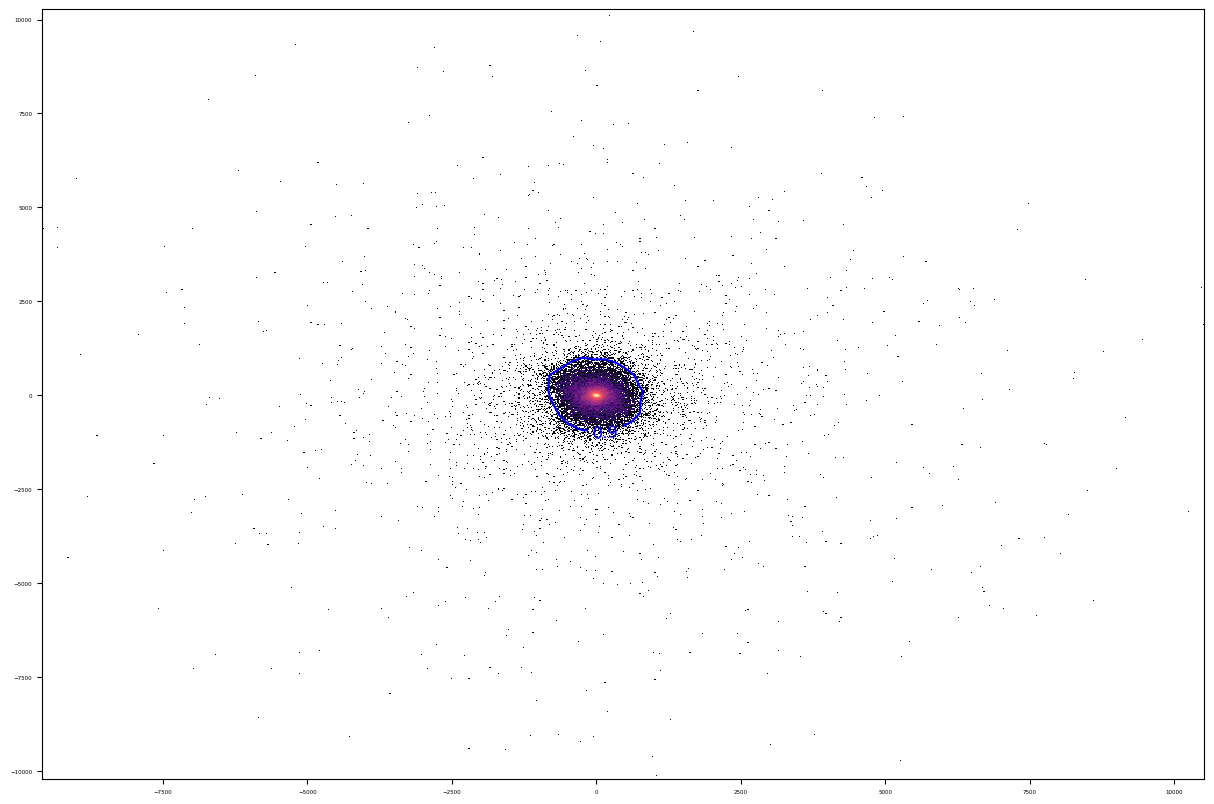

In [225]:
fig, ax= plt.subplots(figsize=(15, 10))
d,c=density_contour(rn[:,0],rn[:,1], 100, 100, ax=ax, colors=['blue'])
#print(d)
#ax.plot(d[0],d[1],"bp")
ax.hist2d(rn[:,0],rn[:,1],bins=1000, norm=LogNorm(), cmap='magma')
plt.savefig('Remnant_95%.png')

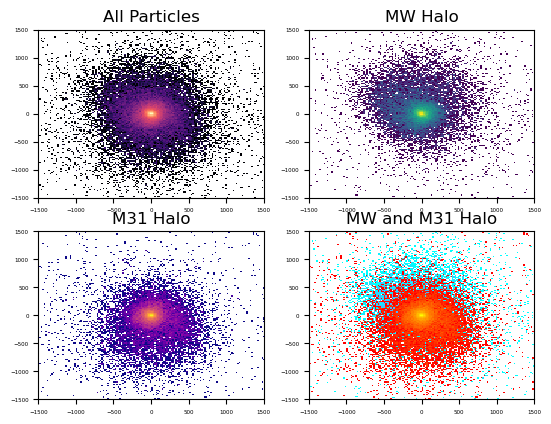

In [226]:
# Rotated MW-M31 halo - FACE ON

#Set up 2x2 plot
fig, ax = plt.subplots(2, 2)
#plot all particles
ax[0, 0].hist2d(rn[:,0],rn[:,1], bins=1000, norm=LogNorm(), cmap='magma')
ax[0, 0].set_title('All Particles')
#plot just MW particles
ax[0, 1].hist2d(rMW[:,0],rMW[:,1], bins=1000, norm=LogNorm(), cmap='viridis')
ax[0, 1].set_title('MW Halo')
#plot M31
ax[1, 0].hist2d(rM31[:,0],rM31[:,1], bins=1000, norm=LogNorm(), cmap='plasma')
ax[1, 0].set_title('M31 Halo')
#bloth both MW and M31 but in diffrent colors
ax[1, 1].hist2d(rMW[:,0],rMW[:,1], bins=1000, norm=LogNorm(), cmap='cool')
ax[1, 1].hist2d(rM31[:,0],rM31[:,1], bins=1000, norm=LogNorm(), cmap='autumn')
ax[1, 1].set_title('MW and M31 Halo')


#focus on center of galaxy
ax[0, 0].set_xlim(-1500,1500)
ax[0, 0].set_ylim(-1500,1500)

ax[0, 1].set_xlim(-1500,1500)
ax[0, 1].set_ylim(-1500,1500)

ax[1, 0].set_xlim(-1500,1500)
ax[1, 0].set_ylim(-1500,1500)

ax[1, 1].set_xlim(-1500,1500)
ax[1, 1].set_ylim(-1500,1500)


#cbar = plt.colorbar()
#cbar.set_label("Number of disk particle per bin", fontsize=15)

# make the contour plot
# x pos, y pos, contour res, contour res, axis, colors for contours.
# ADD HERE
#density_contour(rn[:,0], rn[:,1], 80,80, ax=ax, colors=['yellow','red','blue','black'])

# Add axis labels
"""plt.xlabel(' x kpc ', fontsize=22)
plt.ylabel(' y kpc ', fontsize=22)

#set axis limits
plt.ylim(-1000,1000)
plt.xlim(-1000,1000)
"""
#adjust tick label font size
label_size = 4
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


# Save to a file 
plt.savefig('FaceOn_Density.png')


In [326]:
#import specific photutils moduesl needed to fit ellipse

from photutils.isophote import EllipseGeometry
from photutils.aperture import EllipticalAperture
from photutils.isophote import Ellipse

In [328]:
"convert xy data for there data sets in counts and the edges of data"

'xy'

In [330]:
countsxy, xedgesxy, yedgesxy = np.histogram2d(rn[:,0],rn[:,1], bins = 100, range = ((-2000, 2000), (-2000, 2000)))
#our bin size is:
x_binsize = xedges[1] - xedges[0]
y_binsize = yedges[1] - yedges[0]

counts31xy, xedges31, yedges31 = np.histogram2d(rM31[:,0],rM31[:,1], bins = 100, range = ((-2000, 2000), (-2000, 2000)))
#our bin size is:
x_binsize31 = xedges31[1] - xedges31[0]
y_binsize31 = yedges31[1] - yedges31[0]

countsWxy, xedgesW, yedgesW = np.histogram2d(rMW[:,0],rMW[:,1], bins = 100, range = ((-2000, 2000), (-2000, 2000)))
#our bin size is:
x_binsizeW = xedgesW[1] - xedgesW[0]
y_binsizeW = yedgesW[1] - yedgesW[0]

In [332]:
"convert yz data for there data sets in counts and the edges of data"

'yz'

In [334]:
countsyz, yedges, zedges = np.histogram2d(rn[:,1],rn[:,2], bins = 100, range = ((-2000, 2000), (-2000, 2000)))
#our bin size is:

z_binsize = zedges[1] - zedges[0]

counts31yz, yedges31, zedges31 = np.histogram2d(rM31[:,1],rM31[:,2], bins = 100, range = ((-2000, 2000), (-2000, 2000)))
#our bin size is:

z_binsize31 = zedges31[1] - zedges31[0]

countsWyz, xedgesW, zedgesW = np.histogram2d(rMW[:,1],rMW[:,2], bins = 100, range = ((-2000, 2000), (-2000, 2000)))
#our bin size is:

z_binsizeW = zedgesW[1] - zedgesW[0]

In [336]:
"convert xz data for there data sets in counts and the edges of data"

'xz'

In [338]:
countsxz, xedges, zedges = np.histogram2d(rn[:,0],rn[:,2], bins = 100, range = ((-2000, 2000), (-2000, 2000)))

counts31xz, xedges31, zedges31 = np.histogram2d(rM31[:,0],rM31[:,2], bins = 100, range = ((-2000, 2000), (-2000, 2000)))

countsWxz, xedgesW, zedgesW = np.histogram2d(rMW[:,0],rMW[:,2], bins = 100, range = ((-2000, 2000), (-2000, 2000)))


In [340]:
"find center pixles for x,y,z"

'center pixles'

In [342]:
#converting the center into pixel units
x_cen_pixel = -xedges[0]/x_binsize
y_cen_pixel = -yedges[0]/y_binsize
z_cen_pixel = -zedges[0]/z_binsize

#converting the center into pixel units
x_cen_pixel_31 = -xedges31[0]/x_binsize31
y_cen_pixel_31 = -yedges31[0]/y_binsize31
z_cen_pixel_31 = -zedges31[0]/z_binsize31

#converting the center into pixel units
x_cen_pixel_W = -xedgesW[0]/x_binsizeW
y_cen_pixel_W = -yedgesW[0]/y_binsizeW
z_cen_pixel_W = -zedgesW[0]/z_binsizeW

In [344]:
"""generate the gemoerty for each plane
ellipses are more or less centerd on the same spot
This means we can generate one geomerty for each 
plane instead of one for each plane and data set"""

'gemoerty xy'

In [346]:
#defining the ellipse geometry
geometry_xy = EllipseGeometry(x0 = x_cen_pixel, y0 = y_cen_pixel, sma = 150/x_binsize, eps = 0, pa = 0)
#sma is the semi-major axis, eps is the ellipticity and pa is the position angle
#defining the ellipse geometry
geometry_yz = EllipseGeometry(x0 = y_cen_pixel_31, y0 = z_cen_pixel_31, sma = 150/x_binsize, eps = 0, pa = 0)
#sma is the semi-major axis, eps is the ellipticity and pa is the position angle
#defining the ellipse geometry
geometry_xz = EllipseGeometry(x0 = x_cen_pixel_W, y0 = z_cen_pixel_W, sma = 150/x_binsize, eps = 0, pa = 0)
#sma is the semi-major axis, eps is the ellipticity and pa is the position angle

In [348]:
"Fit elleipse using gemotry for xy"

'xy'

In [350]:
ellipsexy = Ellipse(countsxy.T, geometry_xy) #initializing the ellipse object
#you need to transpose the counts matrix to reverse the effect of transposition that Ellipse does internally
isolistxy = ellipsexy.fit_image() 

ellipse31xy = Ellipse(counts31xy.T, geometry_xy) #initializing the ellipse object
#you need to transpose the counts matrix to reverse the effect of transposition that Ellipse does internally
isolist31xy = ellipse31xy.fit_image() 

ellipseWxy = Ellipse(countsWxy.T, geometry_xy) #initializing the ellipse object
#you need to transpose the counts matrix to reverse the effect of transposition that Ellipse does internally
isolistWxy = ellipseWxy.fit_image() 

In [351]:
"Fit elleipse using gemotry for yz"

'gemoerty yz'

In [352]:
ellipseyz = Ellipse(countsyz.T, geometry_yz) #initializing the ellipse object
#you need to transpose the counts matrix to reverse the effect of transposition that Ellipse does internally
isolistyz = ellipseyz.fit_image() 

ellipse31yz = Ellipse(counts31yz.T, geometry_yz) #initializing the ellipse object
#you need to transpose the counts matrix to reverse the effect of transposition that Ellipse does internally
isolist31yz = ellipse31yz.fit_image() 

ellipseWyz = Ellipse(countsWyz.T, geometry_yz) #initializing the ellipse object
#you need to transpose the counts matrix to reverse the effect of transposition that Ellipse does internally
isolistWyz= ellipseWyz.fit_image() 

In [353]:
"Fit elleipse using gemotry for xz"

'geometry xz'

In [354]:
ellipsexz = Ellipse(countsxz.T, geometry_xz) #initializing the ellipse object
#you need to transpose the counts matrix to reverse the effect of transposition that Ellipse does internally
isolistxz = ellipsexz.fit_image() 

ellipse31xz = Ellipse(counts31xz.T, geometry_xz) #initializing the ellipse object
#you need to transpose the counts matrix to reverse the effect of transposition that Ellipse does internally
isolist31xz = ellipse31xz.fit_image() 

ellipseWxz = Ellipse(countsWxz.T, geometry_xz) #initializing the ellipse object
#you need to transpose the counts matrix to reverse the effect of transposition that Ellipse does internally
isolistWxz = ellipseWxz.fit_image() 

In [ ]:
#plot fitted ellispes

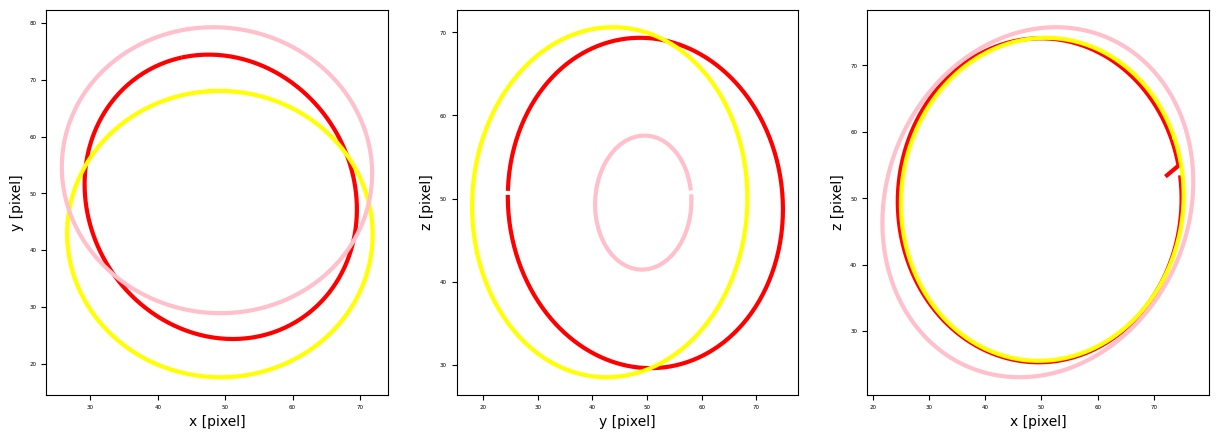

In [430]:
fig = plt.figure(figsize = (15, 5))
ax0 = fig.add_subplot(1, 3, 1)
ax1 = fig.add_subplot(1, 3, 2)
ax2 = fig.add_subplot(1, 3, 3)
cm = plt.cm.inferno
#plot acutal galxy data to double check things before final graph
#ax1.imshow(np.log10(countsyz).T, cmap = cm, origin = "lower")
#ax1.imshow(np.log10(counts31yz).T, cmap = plt.cm.viridis, origin = "lower")
#ax1.imshow(np.log10(countsWyz).T, cmap = plt.cm.cool, origin = "lower")

ax0.set_xlabel('x [pixel]')
ax0.set_ylabel('y [pixel]')

ax1.set_xlabel('y [pixel]')
ax1.set_ylabel('z [pixel]')

ax2.set_xlabel('x [pixel]')
ax2.set_ylabel('z [pixel]')

#fit semi major axis for each direction (x,y,z)
sma_x = 1000/x_binsize

sma_y= 1000/y_binsize

sma_z= 1000/z_binsize
#get and plot xy ellipses
iso = isolistxy.get_closest(sma_x)
iso31 = isolist31xy.get_closest(sma_x)
isoW = isolistWxy.get_closest(sma_x)
#the get_closest method obtains the elliptical contour whose semi-major axis is closest to what you want
x, y = iso.sampled_coordinates()
x31, y31 = iso31.sampled_coordinates()
xW, yW = isoW.sampled_coordinates()

ax0.plot(x, y, color = 'red', linewidth = 3)
ax0.plot(x31, y31, color = 'yellow', linewidth = 3)
ax0.plot(xW, yW, color = 'pink', linewidth = 3)

#get and plot yz ellipses
iso = isolistyz.get_closest(sma_y)
iso31 = isolist31yz.get_closest(sma_y)
isoW = isolistWyz.get_closest(sma_y)
#the get_closest method obtains the elliptical contour whose semi-major axis is closest to what you want
x, y = iso.sampled_coordinates()
x31, y31 = iso31.sampled_coordinates()
xW, yW = isoW.sampled_coordinates()

ax1.plot(x, y, color = 'red', linewidth = 3)
ax1.plot(x31, y31, color = 'yellow', linewidth = 3)
ax1.plot(xW, yW, color = 'pink', linewidth = 3)

    
#get and plot xz ellipses
iso = isolistxz.get_closest(sma_z)
iso31 = isolist31xz.get_closest(sma_z)
isoW = isolistWxz.get_closest(sma_z)
#the get_closest method obtains the elliptical contour whose semi-major axis is closest to what you want
x, y = iso.sampled_coordinates()
x31, y31 = iso31.sampled_coordinates()
xW, yW = isoW.sampled_coordinates()

ax2.plot(x, y, color = 'red', linewidth = 3)
ax2.plot(x31, y31, color = 'yellow', linewidth = 3)
ax2.plot(xW, yW, color = 'pink', linewidth = 3)


plt.show()

In [402]:
eps_1000 = iso_1000.eps
print("Ellipticity of 200 kpc elliptical contour xy perspective: ", np.round(eps_1000, 2))
pa_1000 = (iso_1000.pa)*180/np.pi #converting to degrees
print("Position angle of 200 kpc elliptical contour in degrees xy perspective: ", np.round(pa_1000, 2))

Ellipticity of 200 kpc elliptical contour xy perspective:  0.1
Position angle of 200 kpc elliptical contour in degrees xy perspective:  90.99
